# <b> <p align="center"> <span style="color:	mediumspringgreen "> Neural Network Classification with PyTorch <span> </p> </b>

Classification is a problem of predicing whether something is one thing or another(there can be multiple thing as the option)

## 1. Make classification data and get it ready

In [1]:
import sklearn 
import numpy as np
import torch
from torch import nn

In [2]:
from sklearn.datasets import make_circles

#Make 1000 samples

n_samples=1000

# create circle 

X,y =make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"first 5 data of the X \n: {X[:5]}")
print(f"first 5 data of the y \n: {y[:5]}")

first 5 data of the X 
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 data of the y 
: [1 1 1 1 0]


In [5]:
# Make dataframe of circle data

import pandas as pd

circles=pd.DataFrame({"X1": X[:,0],
                      "X2": X[:,1],
                      "label": y[:]})

In [6]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Text(0.5, 1.0, 'Fucking picture')

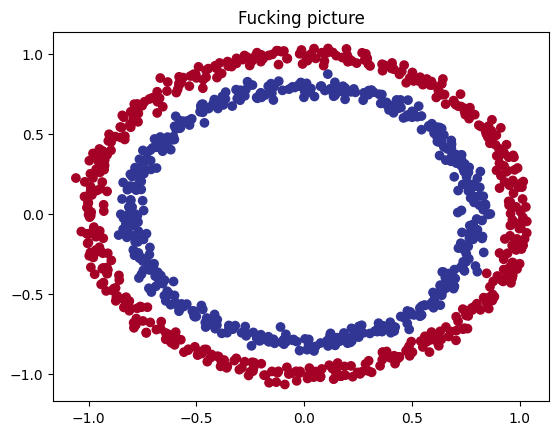

In [7]:
# Visualize , Visualize and Visulalize 

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

plt.title("Fucking picture")

 **Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test split

In [10]:
import torch
torch.__version__

'1.8.1+cu101'

In [11]:
# Turn data into tensor
data_X=torch.from_numpy(X).type(torch.float)

data_y=torch.from_numpy(y).type(torch.float)

In [12]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_X,data_y,test_size=.2,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)



(800, 200, 800, 200)

## 2. Building a Model

Let's build a model to classify our blue and red dots.

To do so , we want to :

1. Setup device agnostic code so our code will run on an acceleration(GPU)  if there is one 

2. Construct a model (by subclassing nn.Module) 

3. Define a loss function and optimizer

4. Create a training and test loop



In [13]:
# Device agnsotic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model 
4. Instantiate an instance of our model class and send it to our target device 

In [14]:
# 1. Construting a model that subclass nn.Module


class CircleModelV0(nn.Module):

    def __init__(self):
        super().__init__()

        # Create 2 nn.Layer that are capable of handling the shapes of our data

        self.layer_1=nn.Linear(in_features=2,
                               out_features=5)
                                                 # Takes in 2 feature and upscales to 5 features
        self.layer_2=nn.Linear(in_features=5,
                               out_features=1) # takes in 5 features from previous layer and outputs a single feature 
    
    # 3. Define a forward() method that outlines the forward pass
        
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x->layer_1->layer_2

# instantiate an instance of our model class and send it to our target device 

model_0 = CircleModelV0().to(device)


In [15]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
# Let's replace the model above using nn.Sequential()

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)


model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5247,  0.2919],
                      [-0.4685, -0.6730],
                      [ 0.5036, -0.0856],
                      [-0.6043, -0.3606],
                      [ 0.3914,  0.6877]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2088,  0.0107,  0.3903, -0.5891,  0.5333], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0515, -0.1289, -0.1868, -0.2183,  0.1555]], device='cuda:0')),
             ('1.bias', tensor([0.1060], device='cuda:0'))])

In [19]:
# Make prediction
with torch.no_grad():
    untrained_preds = model_0(X_test.to(device))
    untrained_preds=torch.round(untrained_preds).squeeze(dim=1)

print(f"Length of prediction : {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample : {len(X_test)}, Shape : {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels : \n {y_test[:10]}")

Length of prediction : 200, Shape: torch.Size([200])
Length of test sample : 200, Shape : torch.Size([200, 2])

First 10 predictions: 
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1.], device='cuda:0')

First 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss or optimizer 

Which loss function or optimizer should you use ?

Again.. this is problem specific.

For example for regression you might want MAE or MSE(mean absolute or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy 

As a reminder , the loss function is the how wrong your model predict 

And for optimizer , two of the most common and useful are SGD and Adam , however PyTOrch has many build0-in options 

In [20]:
# Setup the loss function 
# loss_fn = nn.BCLoss() # BCELoss = requires inputs to have gone through the sigmoid activation fucntion prior to input BCELoss

loss_fn=nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built -in 


optimizer= torch.optim.SGD (params=model_0.parameters(),
                            lr=0.01)



In [21]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right ?

def accuracy_fn(y_true,y_pred):

    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))
    return acc

## 3. Train Model

To train our model we need to have the training loop. 

1. Forward pass

2. Calculate the loss function

3. Optimize zero grad

4. Loss backward

5. Optimize step 


### 3.1 Going from raw logits -> prediction probability to prediction labels

Our model outputs are going to be raw logits

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification )

Then we can convert our model's prediction probabilities to predictions labels by either rounding them or talking the argmax()



In [22]:
# Veiw first 5 outputs of the forward pass on the test data 

with torch.no_grad():

    y_logits =model_0(X_test.to(device))[:5]
    
y_logits

tensor([[0.3900],
        [0.5258],
        [0.0441],
        [0.4880],
        [0.0599]], device='cuda:0')

In [23]:
# Use the sigmoid activation funtion on our model logits to turn them into prediction probability 

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.5963],
        [0.6285],
        [0.5110],
        [0.6196],
        [0.5150]], device='cuda:0')

For our prediction probability values, we need to perform a range - style rounding on them:

* `y_pred_probs` >=0.5 , y=1 (class = 1)
* `y_pred_probs` < 0.5 , y=0 (class = 0)

In [24]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop 


In [26]:

# Set the number of epochs

epochs=100


# Put data to target device

X_train, y_train= X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device) , y_test.to(device)

for epoch in range (epochs):

    ## training 

    model_0.train()

    ## 1. forward pass

    y_logits=model_0(X_train).squeeze()

    y_pred=torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred lables


    ## 2. calculate the loss/accuracy function

    loss=loss_fn(y_logits,y_train)

    train_acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    

    ## 3. optimize the loss function

    optimizer.zero_grad()

    ## 4. backward pass

    loss.backward

    ## 5. Optimizer step ( gradient descent)

    optimizer.step()


    ### Testing 

    model_0.eval()


    with torch.no_grad():

        # 1. Forward pass

        test_logits=model_0(X_test).squeeze()

        test_pred=torch.round(torch.sigmoid(test_logits)) 

        # 2. Calculate test loss/acc

        test_loss= loss_fn(test_logits,
                           y_test)
        
        test_acc=accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
        
    
    if epoch %10 ==0:
        print("For Training : ")
        print(f"Epoch : {epoch} | Loss : {loss:.5f} | accuracy : {train_acc} ")
        print("\nFor Testing : ")
        print(f"Epoch : {epoch} | Loss : {test_loss:.5f} | accuracy : {test_acc} ")
        print("\n")
    



For Training : 
Epoch : 0 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 0 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 10 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 10 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 20 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 20 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 30 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 30 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 40 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 40 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 50 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 50 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 60 | Loss : 0.70310 | accuracy : 0.54875 

For Testing : 
Epoch : 60 | Loss : 0.71464 | accuracy : 0.515 


For Training : 
Epoch : 70 | Loss : 0.70310 | accuracy : 0.54875 

For Testing

## 4. Make predictions and evaluate the model 


From the matrics it looks like our model isn't learning anything 

So to inspect it let's make some predictions and make them visual 

In other words , " Visualize , visualize , visualize "


To do so , we're going to import a function called `plot_decision_boundary()`


In [27]:
#! pip install helper_funcs

### As per my version is <1.9.0 so I have to use the code : `with torch.no_grad():`

In [28]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/ShafaetUllah032/DL-MLWithTorch/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


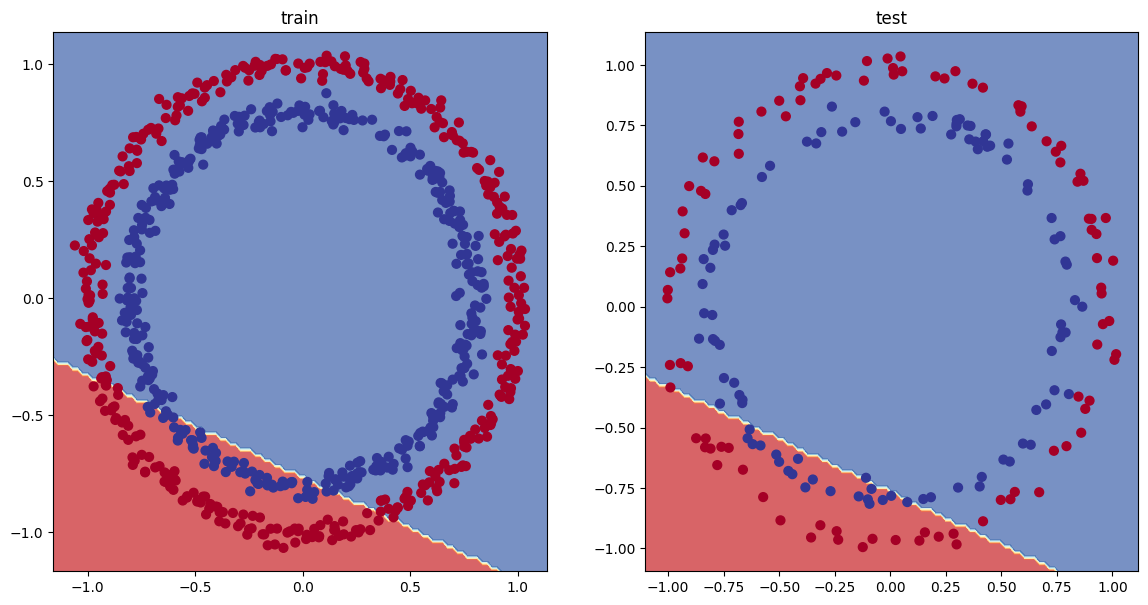

In [29]:
#Plot descision boundary of the model

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)

plt.title("train")

plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_0,X_test,y_test)



##

## 5. Improving a model (from a model perspective)

* Add more layer - give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer - 

* Changing the activation functions 

* Change the learning rate 

* Change the loss function


These options are all from a model's perspective beacuse they deal directly with a model , rather than the data. 

And because these options are all values we (as machine learning engineers and data scientists) can  change , they are referred as **hyperparameters**

Let's try and improve our model by :
 * Adding more hidden units : 5->10

 * Increase the number of layers: 2->3

 * Increase the number of epochs: 100 -> 1000


  


In [30]:
class CircleModelV1(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=10)
        self.layer_2 = nn.Linear(in_features=10, 
                                out_features= 10)
        
        self.layer_3 = nn.Linear(in_features=10, 
                                out_features=1)
        

    def forward(self,x):

        # z = self.layer1(x)
        # z=self.layer2(z)
        # z=self.layer3(z)

        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes


model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4745, -0.2195],
                      [ 0.5837,  0.6175],
                      [ 0.5600, -0.2529],
                      [ 0.6072,  0.1167],
                      [-0.2882, -0.1298],
                      [-0.0437, -0.3458],
                      [ 0.5937, -0.6982],
                      [-0.3223,  0.0940],
                      [-0.3945, -0.3939],
                      [ 0.0615, -0.0585]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5403,  0.2163,  0.4243,  0.0614, -0.3459,  0.3238,  0.2128,  0.5452,
                       0.3819, -0.5798], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2026,  0.2641, -0.1120,  0.0707,  0.0063, -0.2351, -0.3120, -0.0591,
                        0.3143, -0.2134],
                      [-0.1910,  0.2556,  0.0861,  0.2119,  0.1841,  0.0277,  0.0321,  0.0532,
                        0.0726, -0.0231],
                      [-0.3000,  0.089

In [32]:
model_1.parameters

<bound method Module.parameters of CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)>

In [33]:
# Create a loss Function 
loss_fn=nn.BCEWithLogitsLoss()


# Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1
                            )

In [34]:
# Write a training and evaluation loop for model_1

torch.manual_seed=42
torch.cuda.manual_seed = 42


## Train for longer

epochs=1000

# Put data on the device 

X_train, y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device) , y_test.to(device)



for epoch in range(epochs):

    model_1.train()

    # Forward pass 

    y_logits=model_1(X_train).squeeze()

    y_pred=torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss function

    loss=loss_fn(y_logits,y_train)

    train_acc=accuracy_fn(y_true=y_train, y_pred= y_pred)

    # 3. Optimizer the zero grad

    optimizer.zero_grad()

    # 4. loss backward

    loss.backward()

    # 5. optimizer step()

    optimizer.step()


    # Testing 

    model_1.eval()

    with torch.no_grad():
        
        # 1 . Forward pass 

        test_logits=model_1(X_test).squeeze()
        
        test_pred= torch.round(torch.sigmoid(test_logits))

        # Calculate the loss function

        test_loss=loss_fn(test_logits,y_test)

        test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)


    
    # Print the details 

    if epoch % 100 == 0:

        print(f"epoch : {epoch} | training loss : {loss} | training accuracy : {train_acc}")

        print(f"epoch : {epoch} | testing loss : {test_loss} | testing accuracy : {test_acc}")
        print("\n")

        



epoch : 0 | training loss : 0.6942490935325623 | training accuracy : 0.50375
epoch : 0 | testing loss : 0.6934277415275574 | testing accuracy : 0.555


epoch : 100 | training loss : 0.6931653618812561 | training accuracy : 0.495
epoch : 100 | testing loss : 0.6935364603996277 | testing accuracy : 0.515




epoch : 200 | training loss : 0.6930168867111206 | training accuracy : 0.51
epoch : 200 | testing loss : 0.6940407156944275 | testing accuracy : 0.46


epoch : 300 | training loss : 0.6929877996444702 | training accuracy : 0.50875
epoch : 300 | testing loss : 0.6943531632423401 | testing accuracy : 0.47


epoch : 400 | training loss : 0.6929815411567688 | training accuracy : 0.515
epoch : 400 | testing loss : 0.6945188641548157 | testing accuracy : 0.46


epoch : 500 | training loss : 0.692980170249939 | training accuracy : 0.51375
epoch : 500 | testing loss : 0.694601833820343 | testing accuracy : 0.445


epoch : 600 | training loss : 0.6929798722267151 | training accuracy : 0.51375
epoch : 600 | testing loss : 0.6946423053741455 | testing accuracy : 0.45


epoch : 700 | training loss : 0.6929798722267151 | training accuracy : 0.51125
epoch : 700 | testing loss : 0.6946617960929871 | testing accuracy : 0.455


epoch : 800 | training loss : 0.6929798722267151 | training accuracy : 0.51

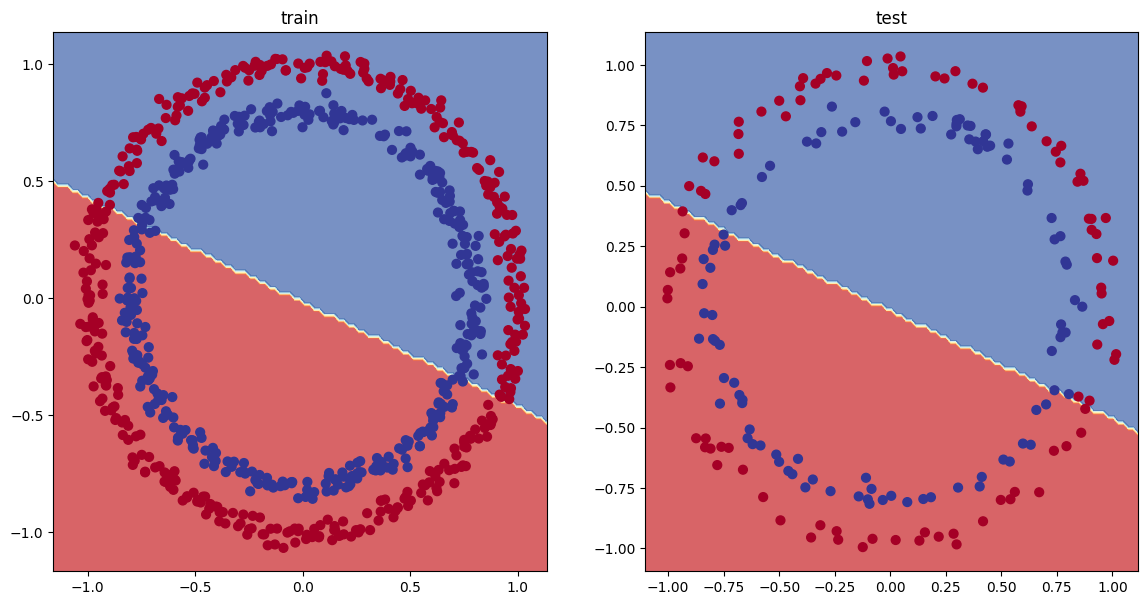

In [35]:
#Plot descision boundary of the model

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)

plt.title("train")

plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line 


One way to troubleshoot to a larger problem is to test out a smaller problem. 

In [36]:
# Create some data ( same as notebook 01)


weight=0.7
bias=0.3 
start =0
end =1

step=0.001

# Create data 

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)

y_regression = weight * X_regression + bias

In [37]:
import sklearn

from sklearn.model_selection import train_test_split

X_train_regression,X_test_regression,y_train_regression,y_test_regression=train_test_split(X_regression,y_regression,test_size=0.2,random_state=42)



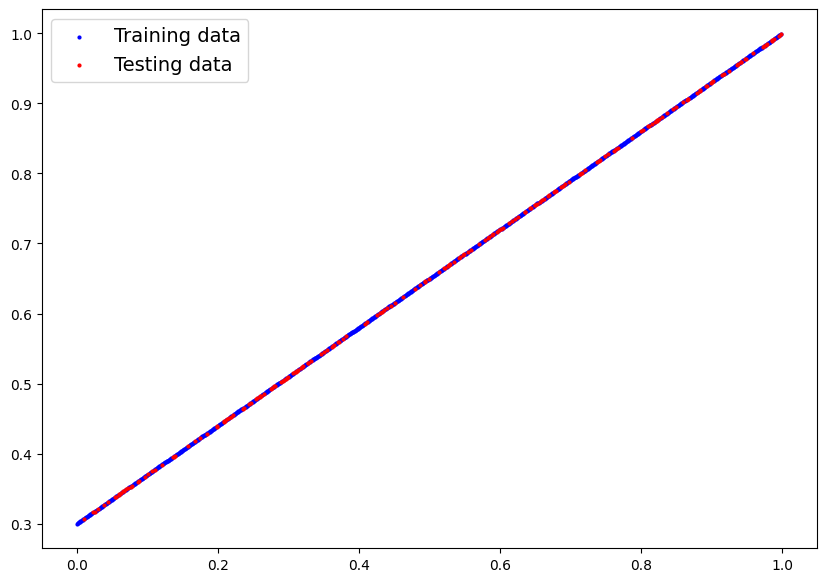

In [38]:
from helper_functions import plot_predictions

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [39]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [40]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [42]:
# Train the model
#torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.no_grad():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.68020, Test loss: 0.63815
Epoch: 100 | Train loss: 0.05154, Test loss: 0.00949


Epoch: 200 | Train loss: 0.04511, Test loss: 0.01353
Epoch: 300 | Train loss: 0.04148, Test loss: 0.01490
Epoch: 400 | Train loss: 0.03492, Test loss: 0.01947
Epoch: 500 | Train loss: 0.03348, Test loss: 0.01907
Epoch: 600 | Train loss: 0.03264, Test loss: 0.01837
Epoch: 700 | Train loss: 0.03168, Test loss: 0.01790
Epoch: 800 | Train loss: 0.03088, Test loss: 0.01738
Epoch: 900 | Train loss: 0.02993, Test loss: 0.01709


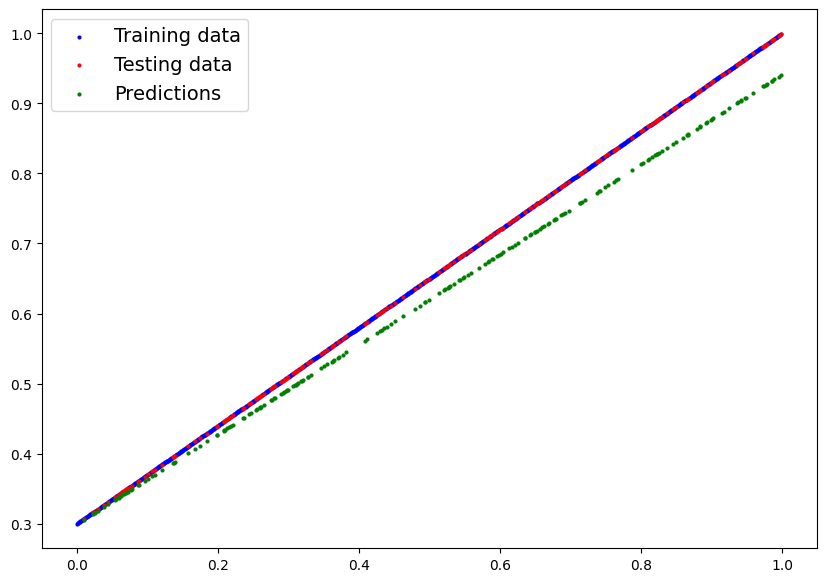

In [43]:
# Turn on evaluation mode 

model_2.eval()

# make prediction(inference)

with torch.no_grad():

    y_pred_regression=model_2(X_test_regression).to(device)

# Plot data and predictions 

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_pred_regression.cpu())

## 6. The missing piece : non-linearity

" What pattern could you draw if you were given an infinite of a straight and non-straight lines ? "

or in machine learning terms , an infinite (but really it is finite) of linear and non linear function ?



### 6.1 Recreating non-lenear data (red and blue circles)



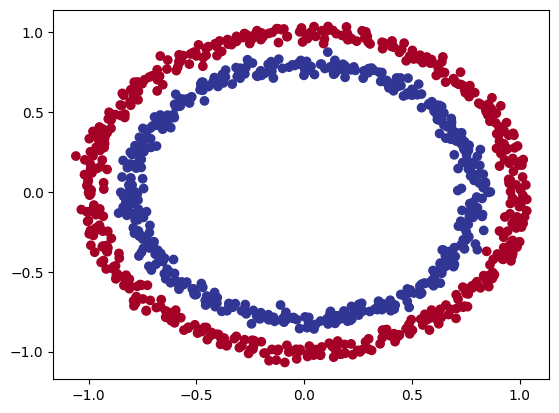

In [44]:
# Make and plot data 

import  matplotlib.pyplot as plt


from sklearn.datasets import make_circles

n_samples = 1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [45]:
# Convert data to tensor and then to train and test splits

import torch 
from sklearn.model_selection import train_test_split


# Turn data into torch 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non_linear = non-straight lines

In [46]:
# Build a model with non-linear activation functions


from torch import nn
class CircleModelV2(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU() # relu is a non-linear activation function

    def forward(self,x):

        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    


model_3=CircleModelV2().to(device)



In [47]:
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# setup a loss function and optimizer

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)

### 6.3 Training a model with non - linearty

In [49]:
# Random seeds

#torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# put all data on target device


X_train, y_train = X_train.to(device), y_train.to(device)

X_test,y_test=X_test.to(device) , y_test.to(device)

# Loop Through data 

epochs = 1000

for epoch in range(epochs):

    ## Training 

    model_3.train()

    # 1. forward pass 

    y_logits=model_3(X_train).squeeze()

    y_pred=torch.round(torch.sigmoid(y_logits))

    # 2. calculate the loss 

    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_pred=y_pred,y_true=y_train)

    # 3. optimize the loss

    optimizer.zero_grad()

    # 4. loss backward

    loss.backward()

    # 5. optimizer step

    optimizer.step()


    # Testing 

    model_3.eval()

    with torch.no_grad():

        test_logits=model_3(X_test).squeeze()

        test_pred= torch.round(torch.sigmoid(test_logits))

        test_loss=loss_fn(test_logits,y_test)

        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch % 100 ==0 :
        
        print(f"epoch : {epoch} | Test loss : {loss} | training accuracy :{acc}| testing loss : {test_loss} | testing accu: {test_acc}")


    




epoch : 0 | Test loss : 0.6981980204582214 | training accuracy :0.5| testing loss : 0.6952785849571228 | testing accu: 0.5
epoch : 100 | Test loss : 0.6907049417495728 | training accuracy :0.50375| testing loss : 0.6897424459457397 | testing accu: 0.53


epoch : 200 | Test loss : 0.6879681348800659 | training accuracy :0.575| testing loss : 0.6879276633262634 | testing accu: 0.56
epoch : 300 | Test loss : 0.6848629713058472 | training accuracy :0.61875| testing loss : 0.6854727268218994 | testing accu: 0.59
epoch : 400 | Test loss : 0.6803135275840759 | training accuracy :0.61875| testing loss : 0.6816938519477844 | testing accu: 0.595
epoch : 500 | Test loss : 0.6727602481842041 | training accuracy :0.67| testing loss : 0.6758114695549011 | testing accu: 0.645
epoch : 600 | Test loss : 0.6597006320953369 | training accuracy :0.7525| testing loss : 0.6656341552734375 | testing accu: 0.685
epoch : 700 | Test loss : 0.6359439492225647 | training accuracy :0.8325| testing loss : 0.6470755338668823 | testing accu: 0.745
epoch : 800 | Test loss : 0.5913593769073486 | training accuracy :0.90375| testing loss : 0.6095923781394958 | testing accu: 0.825
epoch : 900 | Test loss : 0.5079697966575623 | training accuracy :0.96| testing loss : 0.537

In [50]:

model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 3.6102e-03,  1.9811e-01],
                      [-5.0175e-01,  1.0311e+00],
                      [-7.3256e-01, -1.0091e+00],
                      [-5.1033e-01, -8.5208e-01],
                      [ 8.5278e-01,  9.9890e-01],
                      [ 8.7732e-01, -1.4639e+00],
                      [ 8.2447e-01,  1.4126e-03],
                      [-2.0536e-01, -5.5187e-01],
                      [-1.4720e+00, -1.4074e-01],
                      [ 3.6048e-01, -1.0084e-01]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4176, -0.3142, -0.1898,  1.0540,  0.2150, -0.3790, -0.2046,  0.5872,
                      -0.1667, -0.1597], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1559, -0.2348,  0.1674, -0.2039,  0.0475,  0.0770, -0.1695, -0.0969,
                       -0.0913, -0.0288],
                      [-0.0361,  0.1644, -0.1716, -0.2809, -0.0330, -0.2040, -0.2566, -0.1233,


### 6.4 Evaluating a model trained with non linear activation functions

In [51]:
# Makes predictions 

model_3.eval()

with torch.no_grad():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()


y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

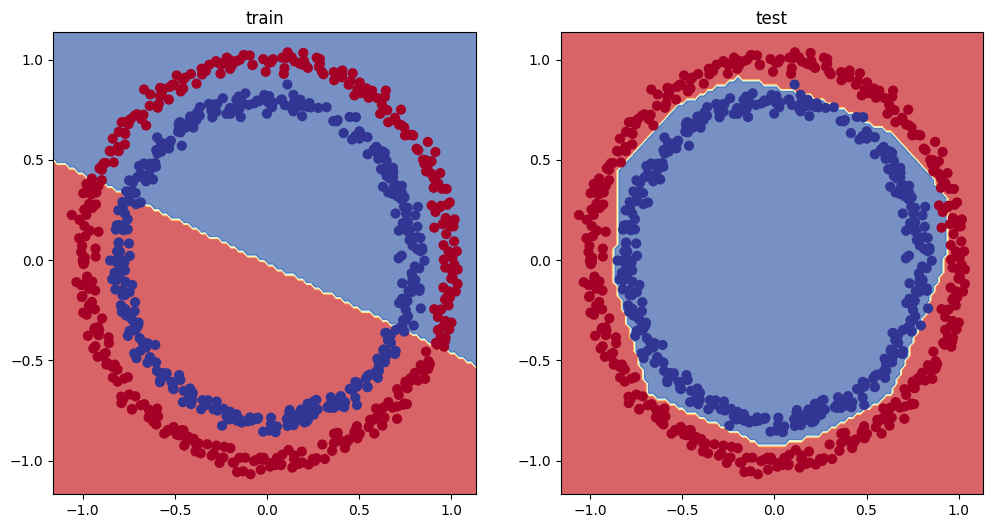

In [52]:
# Plot descision boundaries 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")

plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_3,X_train,y_train)

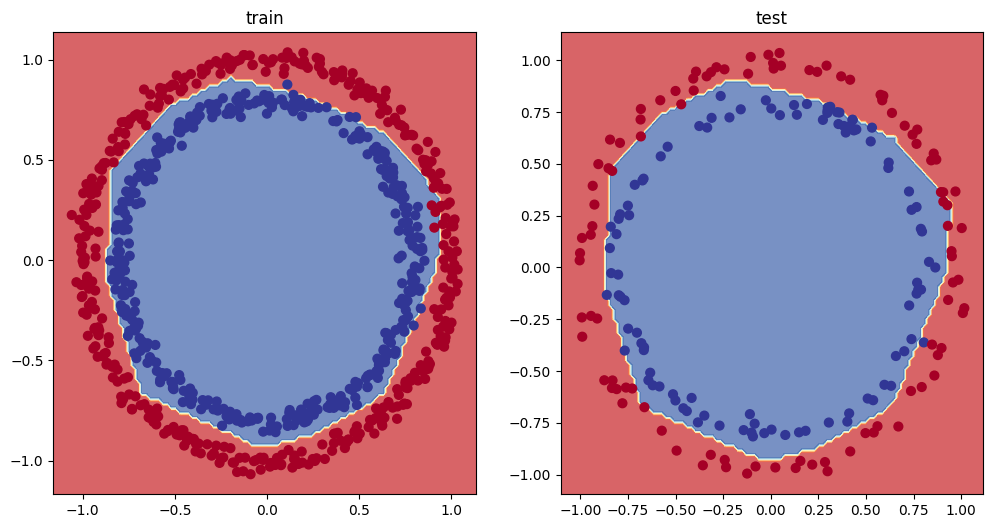

In [53]:
# Plot descision boundaries 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")

plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_3,X_test,y_test)


## 7. Replacating non-linear activation functions 

Neural networks, rather than us telling the model what to learn, we give it tools to discover pattern in data and it tries to figure out the patterns on its own. 

And these tools are linear and non-linear functions 

In [54]:
# Create a tensor 

A = torch.arange(-10,10,1)
A.dtype

torch.int64

In [55]:
A=A.to(torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

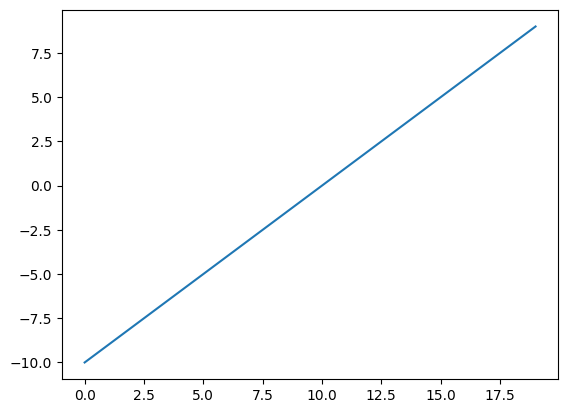

In [56]:
# Visualize the data 

plt.plot(A)

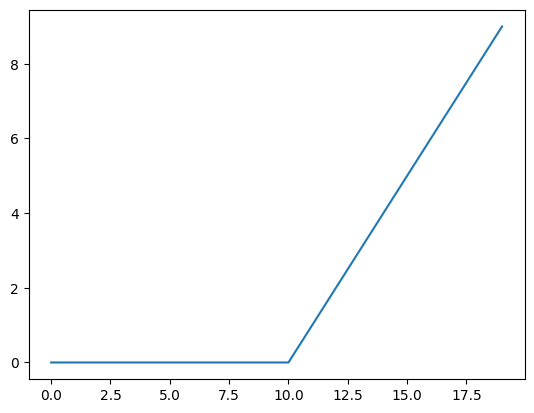

In [57]:
plt.plot(torch.relu(A))

In [58]:
def relu(x: torch.tensor)->torch.tensor:

    return torch.maximum(torch.tensor(0),x) 

In [59]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

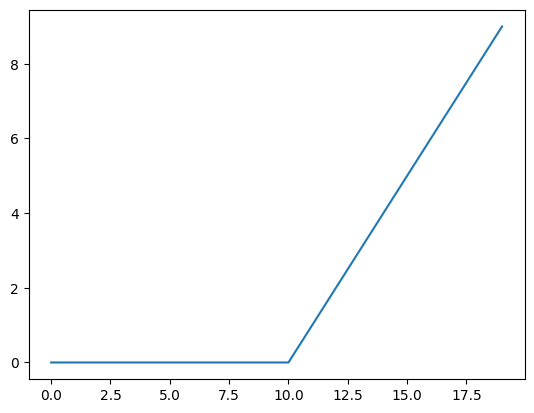

In [60]:
# plot relu activation function 

plt.plot(relu(A))

In [61]:
# sigmoid function

def sigmoid(x: torch.tensor)->torch.tensor:

    return 1/(1+torch.exp(-x))

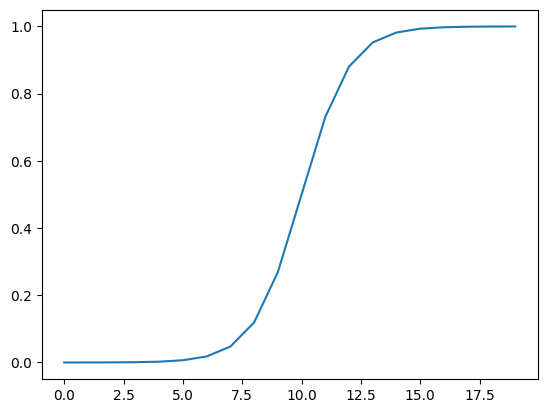

In [62]:
# Plot the sigmoid function 

plt.plot(sigmoid(A))

## 8. MultiClass Classification 

* Binary classification = one thing or another (cat vs dog, spam vs not spam)

* Multiclass Classification = more than one thing or another (cat vs dog vs chicken)


### 8.1 Create a toy dataset (Multi Class )

Text(0.5, 1.0, 'test data')

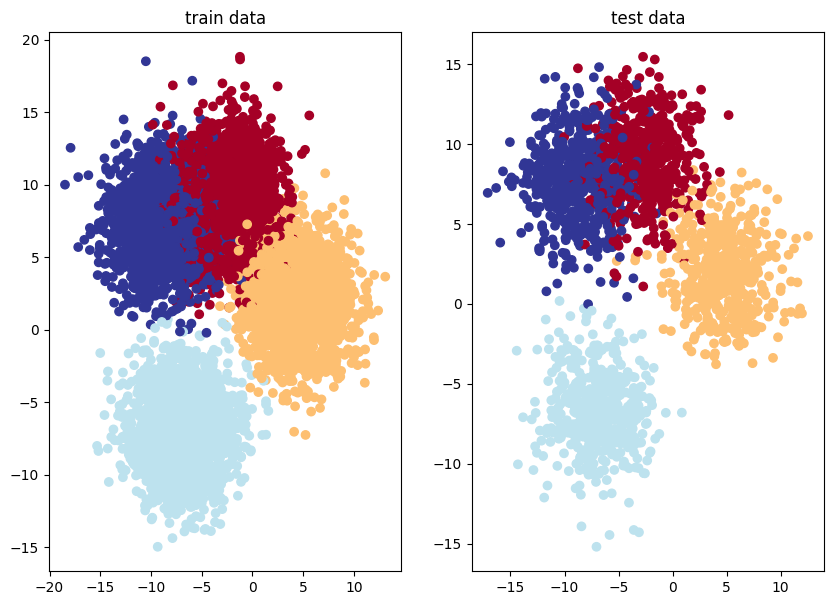

In [63]:
import torch

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyperparameters for data creation

NUM_CLASSES = 4
NUM_FEATURES=2
RANDOM_SEED=42

# 1. Create multi-class data

X_blob, y_blob= make_blobs(n_samples=10000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=2.5,
                           random_state=RANDOM_SEED)


# 2. Turn data into tensor

# X_blob=torch.tensor(X_blob)
# y_blob=torch.tensor(y_blob)

X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


# 3. split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2 , random_state= RANDOM_SEED)


# 4. plot data (visualize , visualize, visualize)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(X_blob_train[:,0],X_blob_train[:,1],c=y_blob_train , cmap=plt.cm.RdYlBu)
plt.title("train data")
plt.subplot(1,2,2)
plt.scatter(X_blob_test[:,0],X_blob_test[:,1],c=y_blob_test , cmap=plt.cm.RdYlBu)
plt.title("test data")




In [64]:
# Device agnostics

device="cuda" if torch.cuda.is_available() else "cpu"

###  8.2 Building a multiclass classification model in pythorch

In [65]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [66]:
X_blob_train.shape , y_blob_train.shape

(torch.Size([8000, 2]), torch.Size([8000]))

In [67]:
torch.unique(y_blob)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and classifier for multiclass classification

In [68]:
# Assign a loss function 

loss_fn=nn.CrossEntropyLoss()


# Assign a optimizer 

optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

### 8.4 Getting prediction probability for a multiclass PyTorch model

In order to evaluate and train and test our model , we need to convert the model's outputs(logits) to predictions probability and then to prediction labels 

Logits(raw output of the model) -> Pred probs (use the `torch.softmax` to make prediction probability) -> Pred labels(take the argmax of the prediction probabilities)

In [69]:
# Let's get some raw outputs of our model(logits)

model_4.eval()

with torch.no_grad():

    y_blob_logits=model_4(X_train.to(device)).squeeze()


y_blob_logits[:5]


tensor([[ 0.4443, -0.1276, -0.0182, -0.1860],
        [ 0.4283, -0.1376, -0.0325, -0.1901],
        [ 0.4316, -0.1920,  0.1271, -0.1877],
        [ 0.4259, -0.1821,  0.1188, -0.1982],
        [ 0.4607, -0.1746,  0.1266, -0.1840]], device='cuda:0')

In [70]:
y_blob_test[:5]

tensor([1, 1, 1, 2, 3])

### 8.5 Create a training loop and testing loop for a multiclass PyTorch model


In [71]:
y_blob_logits.dtype



torch.float32

In [72]:
## assigning a manual_seed 

#torch.manual_seed(42)

# Taking data to the target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)

X_blob_test,y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


# Assigning the number of epochs

epochs=10000

for epoch in range(epochs):

    ### Training

    model_4.train()

    # 1. Forward pass

    y_blob_logits=model_4(X_blob_train)

    y_blob_pred=torch.softmax(y_blob_logits,dim=1).argmax(dim=1)


    # 2. calculate the loss function

    blob_loss=loss_fn(y_blob_logits,y_blob_train)

    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_blob_pred)

    # 3. Optimize the zero grad

    optimizer.zero_grad()

    # 4. loss backward 

    blob_loss.backward()

    # 5. optimizer step

    optimizer.step()
    

    ### Testing 

    model_4.eval()

    with torch.no_grad():

        y_blob_test_logits=model_4(X_blob_test)

        y_blob_test_pred=torch.softmax(y_blob_test_logits, dim =1).argmax(dim=1)

        blob_test_loss=loss_fn(y_blob_test_logits,y_blob_test)

        test_acc= accuracy_fn(y_true=y_blob_test, y_pred=y_blob_test_pred)


    if epoch %1000 ==0:
        
        print(f" epoch : {epoch} | training Loss :{blob_loss:4f} | training accuracy : {acc:.5f}")
        print(f" epoch : {epoch} | test Loss :{blob_test_loss:4f} | test accuracy : {test_acc:.5f}")



    



 epoch : 0 | training Loss :1.388363 | training accuracy : 0.26850
 epoch : 0 | test Loss :1.106877 | test accuracy : 0.48650


 epoch : 1000 | training Loss :0.157066 | training accuracy : 0.93388
 epoch : 1000 | test Loss :0.169982 | test accuracy : 0.93200
 epoch : 2000 | training Loss :0.149238 | training accuracy : 0.94088
 epoch : 2000 | test Loss :0.158756 | test accuracy : 0.93500
 epoch : 3000 | training Loss :0.148429 | training accuracy : 0.94000
 epoch : 3000 | test Loss :0.157402 | test accuracy : 0.93500
 epoch : 4000 | training Loss :0.148258 | training accuracy : 0.94063
 epoch : 4000 | test Loss :0.157132 | test accuracy : 0.93500
 epoch : 5000 | training Loss :0.148146 | training accuracy : 0.94037
 epoch : 5000 | test Loss :0.156983 | test accuracy : 0.93350
 epoch : 6000 | training Loss :0.148088 | training accuracy : 0.94037
 epoch : 6000 | test Loss :0.156969 | test accuracy : 0.93350
 epoch : 7000 | training Loss :0.148043 | training accuracy : 0.94025
 epoch : 7000 | test Loss :0.156951 | test accuracy : 0.93350
 epoch : 8000 | training Loss :0.147971 | training accuracy : 0.94037
 epoch

### 8.6 Making and evaluating predictions with a pytorch multi-class model



In [73]:
model_4.eval()

with torch.no_grad():
    y_blob_logits_eval=model_4(X_blob_train)

    y_blob_probs_eval=torch.softmax(y_blob_logits_eval,dim=1)

    y_blob_pred_eval=y_blob_probs_eval.argmax(dim=1)




# View the first 10 logits

y_blob_logits_eval[:10]

tensor([[ 13.1645,  -2.1897, -10.9557,  10.9628],
        [  9.9700,   1.7072,  -8.6303,   5.6527],
        [  3.0088,  -7.2755,  -0.3836,   8.8662],
        [  6.9303,  -3.9772,  -5.9401,   8.8054],
        [ -6.4732,  -3.4895,  11.7700,  -2.5869],
        [  2.6318,   8.5967,  -4.0014,  -3.8048],
        [  3.2659,  -5.9249,  -1.3695,   8.0063],
        [ -8.1634,  -5.3604,  15.4087,  -2.6267],
        [  5.8357,  -4.6917,  -5.0004,   8.8152],
        [  4.5691,  -4.5319,  -3.8702,   8.1247]], device='cuda:0')

In [74]:
y_blob_probs_eval

tensor([[9.0041e-01, 1.9328e-07, 3.0140e-11, 9.9594e-02],
        [9.8659e-01, 2.5447e-04, 8.2437e-09, 1.3157e-02],
        [2.8503e-03, 9.7384e-08, 9.5856e-05, 9.9705e-01],
        ...,
        [1.3952e-01, 6.9974e-07, 6.0630e-08, 8.6048e-01],
        [9.2073e-03, 4.4119e-07, 1.2537e-05, 9.9078e-01],
        [9.4973e-01, 3.8266e-08, 1.4390e-12, 5.0275e-02]], device='cuda:0')

In [75]:
y_blob_pred_eval[:10]

tensor([0, 0, 3, 3, 2, 1, 3, 2, 3, 3], device='cuda:0')

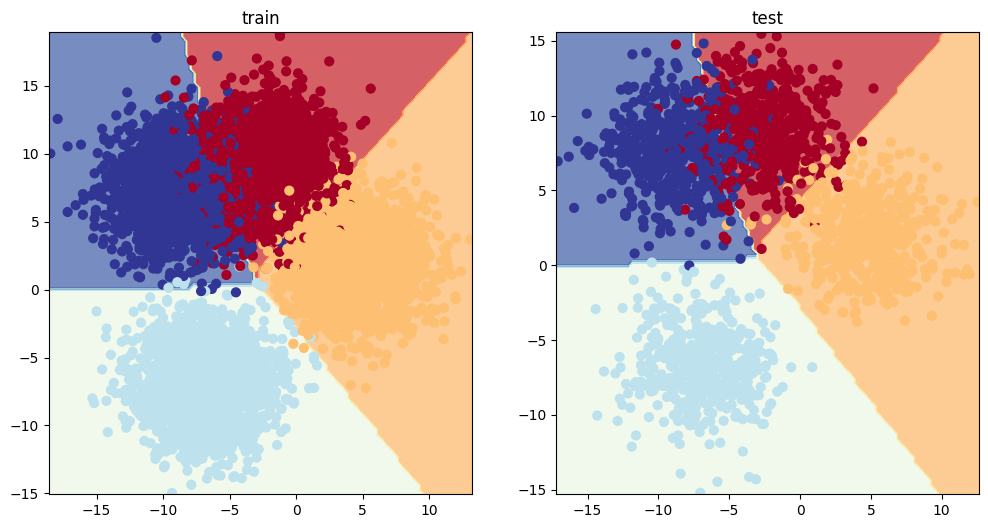

In [76]:
# Plot descision boundaries 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")

plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classification matrics ....(to evaluate our classification model)

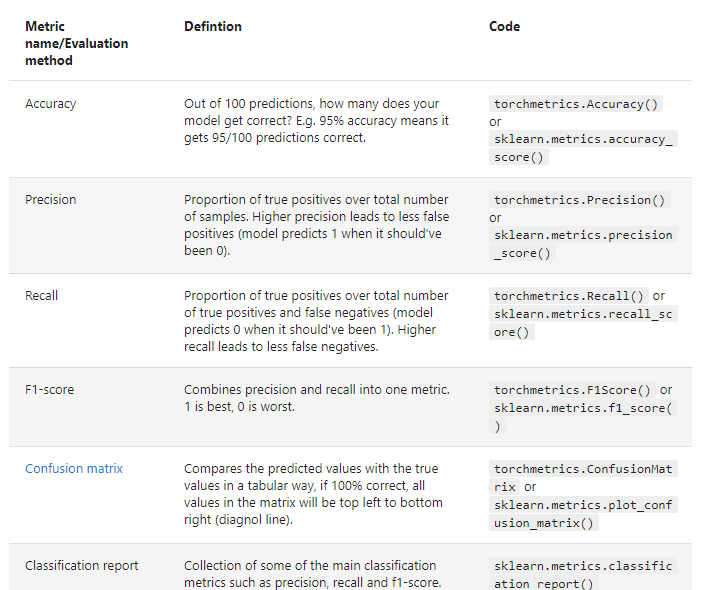

In [2]:
#from torchmetrics import Accuracy

SyntaxError: invalid syntax (1358437887.py, line 1)

In [79]:
# # Setup metric and make sure it's on the target device
# torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# # Calculate accuracy
# torchmetrics_accuracy(y_preds, y_blob_test)